In [1]:
import numpy as np
import seaborn as sn
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [96]:
df1 = pd.read_csv('transaction_fraud/PS_20174392719_1491204439457_log.csv')
df1.shape

(6362620, 11)

In [93]:
df1.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [94]:
df1.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

# Data Exploration

In [34]:
#check for null data
df1.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df1['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

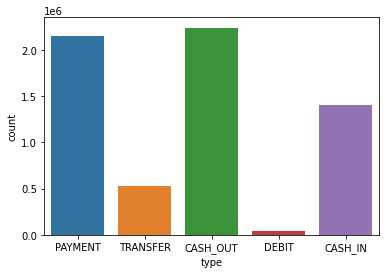

In [9]:
sn.countplot(x='type', data= df1)

### Cash out the most common type of payment

### How much fraud is there?

In [10]:
df1['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

<AxesSubplot:xlabel='isFraud', ylabel='count'>

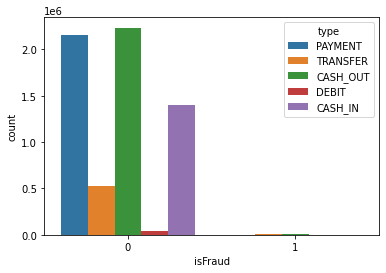

In [12]:
sn.countplot(x='isFraud', data=df1, hue= 'type')

## What is the most profitable type of fraud?

In [18]:
df1.groupby('type').mean()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
type,,,,,,,,
CASH_IN,244.490093,168920.242004,3.590464e+06,3.759379e+06,1.587919e+06,1.467105e+06,0.000000,0.00000
CASH_OUT,240.900735,176273.964346,4.602380e+04,1.747419e+04,1.497758e+06,1.691326e+06,0.001840,0.00000
DEBIT,248.440481,5483.665314,6.864734e+04,6.516165e+04,1.493136e+06,1.513003e+06,0.000000,0.00000
PAYMENT,244.378179,13057.604660,6.821683e+04,6.183789e+04,0.000000e+00,0.000000e+00,0.000000,0.00000
TRANSFER,246.657304,910647.009645,5.444185e+04,1.028816e+04,2.567606e+06,3.554567e+06,0.007688,0.00003


<AxesSubplot:xlabel='type', ylabel='amount'>

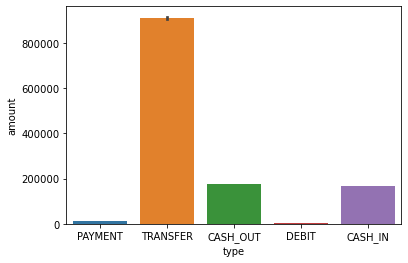

In [24]:
sn.barplot(x='type',y ='amount', data =df1)

## Cash out is most common but transfer is most profitable.

Drop useless columns

In [36]:
df2 = df1.drop(['nameDest','nameOrig'], axis=1)

In [38]:
dummies = pd.get_dummies(df2.type,drop_first=True)

In [39]:
df3 = pd.concat([df2, dummies], axis=1)

In [40]:
df3.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


In [44]:
df4 = df3.drop('type', axis=1)

 ## Split data into training and test data

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X = df4
y = df4['isFraud']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

## Check if X and y are balanced

In [51]:
y_train.value_counts()

0    4448040
1       5794
Name: isFraud, dtype: int64

## We have a extremely unbalanced dataset, so we will generate synthetic data using smote.

In [52]:
from imblearn.over_sampling import SMOTE

In [53]:
os = SMOTE()

In [54]:
X_train_resample, y_train_resample =os.fit_resample(X_train,y_train)

In [56]:
y_train_resample.value_counts()

0    4448040
1    4448040
Name: isFraud, dtype: int64

## We now have a balanced dataset.

# What is the best ml model to use? We can try a few and pick the best one then optimize that model.

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [63]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

In [64]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [0,1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'random_forest' : {
            'model' : RandomForestClassifier(),
            'params' : {
                'n_estimators': [100],
            }
        },
        'logistic_regression' :{
            'model' : LogisticRegression(),
            'params' : {

            }
        }
    }
    scores = []
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False, n_jobs=-1)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [65]:
find_best_model_using_gridsearchcv(X_train_resample,y_train_resample)

C:\Users\shane\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\shane\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_search.py:910: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\shane\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_mo

,model,best_score,best_params
0,linear_regression,1.000000,{'normalize': True}
1,lasso,0.999999,"{'alpha': 0, 'selection': 'cyclic'}"
2,decision_tree,1.000000,"{'criterion': 'mse', 'splitter': 'best'}"
3,random_forest,1.000000,{'n_estimators': 100}
4,logistic_regression,0.914868,{}


In [84]:
rf_clf = GridSearchCV(RandomForestClassifier(),{
    'n_estimators':[2],'n_jobs':[-1]}, cv=cv, return_train_score=False )
rf_clf.fit(X_train_resample,y_train_resample)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.3, train_size=None),
             estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [2], 'n_jobs': [-1]})

In [89]:
y_pred =rf_clf.predict(X_test)

In [90]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred, )
cm

array([[1906367,       0],
       [     14,    2405]], dtype=int64)

In [91]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906367
           1       1.00      0.99      1.00      2419

    accuracy                           1.00   1908786
   macro avg       1.00      1.00      1.00   1908786
weighted avg       1.00      1.00      1.00   1908786



In [92]:
rf_clf.best_estimator_.feature_importances_

array([1.43784614e-03, 4.28537376e-02, 2.34458606e-01, 1.00511320e-01,
       6.22582787e-02, 6.96685914e-02, 2.75614695e-01, 0.00000000e+00,
       7.64433154e-03, 7.68878028e-05, 1.01736919e-01, 1.03738787e-01])

In [117]:
lr_clf = GridSearchCV(LinearRegression(),{
    'normalize': [True],'n_jobs':[-1]}, cv=cv, return_train_score=False )
lr_clf.fit(X_train_resample,y_train_resample)

C:\Users\shane\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\shane\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import 

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.3, train_size=None),
             estimator=LinearRegression(),
             param_grid={'n_jobs': [-1], 'normalize': [True]})

In [118]:
y_pred1 =lr_clf.predict(X_test)

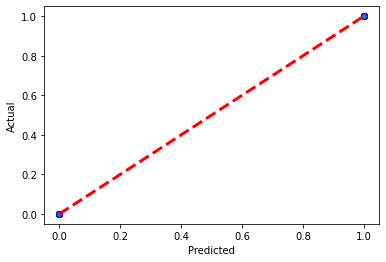

In [121]:
fig, ax = plt.subplots()
ax.scatter(y_pred1, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [122]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred1)
mse = metrics.mean_squared_error(y_test, y_pred1)
r2 = metrics.r2_score(y_test, y_pred1)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 1.0037515281269007e-13
MSE is 1.6059551318221862e-26
R2 score is 1.0
